# üßò‚Äç‚ôÇÔ∏è Basics of CNN in PyTorch
---

Convolutional Neural Networks, do we really understand what goes under the hood? Imagining what actually goes within a deep learning architecture can be tough. That's okay it's normal! As neural networks are still called the *black box*, even though we have moved ahead so much towards powerful-complex models. This notebook is an attempt to understand a very common yet powerful deep learning model of working with image classification, detection, etc., known as **Convolution Neural Network**.

![](https://miro.medium.com/max/3840/1*oB3S5yHHhvougJkPXuc8og.gif)


Here, I have tried to explain each part of the deep learning with CNN architectures. We will be using PyTorch framework. Let's start!

In [1]:
#Importing few libraries 
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (20,10)

In [2]:
img = imageio.imread('../input/cat-and-dog/training_set/training_set/dogs/dog.1.jpg')
img.shape

(499, 327, 3)

# Image
---

Let's understand more about a colored image. The image of an example from the dataset contains RGB(Red Green Blue) Channels. We will try to look how exactly, just a combination of three primary colors forms a complete image.   

![](https://miro.medium.com/max/2146/1*icINeO4H7UKe3NlU1fXqlA.jpeg)

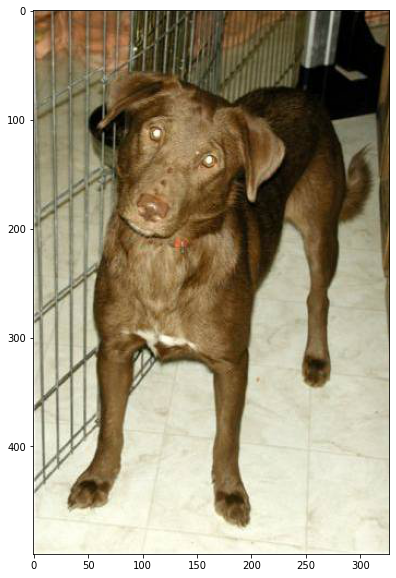

In [3]:
plt.imshow(img)

## RGB Channels
---
Notice the difference between pixel intensities of the original image splitted into images of each individual channels. 

In [4]:
def show_rgb(img):
    for i in range(3):
        plt.subplot(1,3,i+1)
        plt.imshow(img[:,:,i], cmap ='gray')

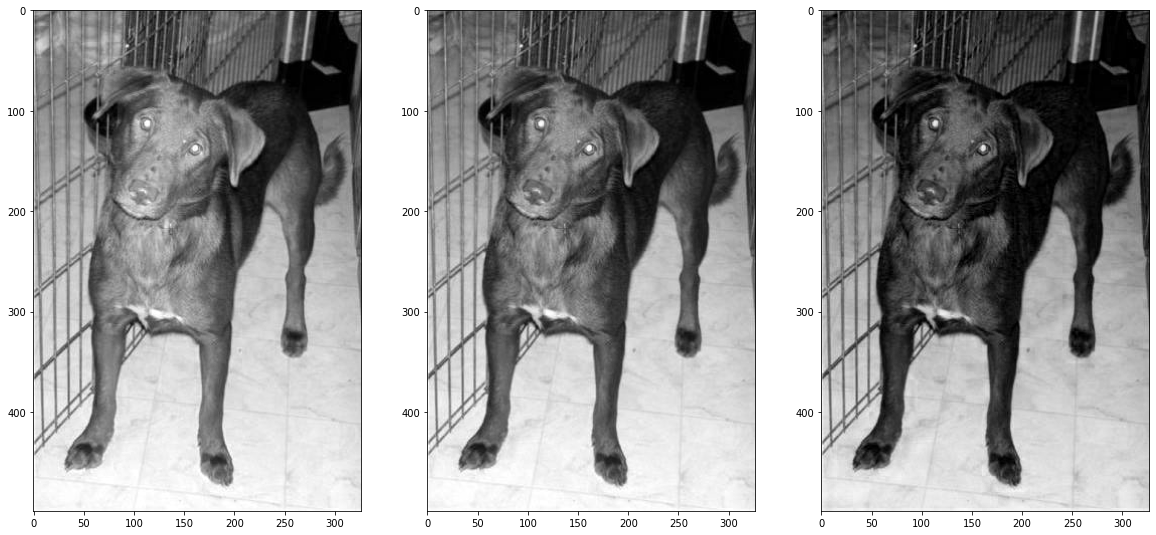

In [5]:
show_rgb(img)

# Convolutions and Layers
---

Now let's develop a model that would learn the information of image and would classify them into 'class'. But before we jump directly into developing some 'deep' architecture, we will each part of a convolution neural network.

![](https://miro.medium.com/max/2560/1*ciDgQEjViWLnCbmX-EeSrA.gif)

## So, what is a Convoution Neural Network?
> In 1990s Yann LeCun introduced a powerful model that would classifiy handwritten digits with high accuracy(at that time). This popular model is known as LeNet. It had few operations different from the traditional [multi-layered perceptron](https://www.kaggle.com/pr2tik1/multi-layered-perceptron-pytorch). The LeNet model had a **convolution** operation and hence the name "Convolution Neural Networks".

This technique proved to be effective after addition of two more factors:

    1. Availability of better and powerful processors such as GPUs and TPUs.
    2. Availability of large sets of data for training and testing.


# Model
---

To summarize a convolution neural network contains: 

- Model:
    - Fully connected Layers
    - Convolution Layers
    - Pooling Layers
    - Normalization Layers
    - Striding operaiton
    - Forward and Backward Propagation
    - Activation Functions

- Hyper-parameters:
    - Updation Rule
    - Loss function
    - Learning Rate

# PyTorch Section
---

PyTorch is one the commonly used frameworks in developing deep learning architectures, training theam and testing the network.

In [6]:
#Importing pytorch and numpy
import torch
import numpy as np
import torch.nn.functional as F

## 1. Fully Conneted Layer
---

In [7]:
#Flat input tensor
x_fc = torch.randn(100,784)
x_fc

tensor([[-1.5674, -1.9792,  0.1724,  ...,  0.6317, -1.4764,  0.6432],
        [-0.9676, -0.2731,  0.3419,  ..., -0.4083, -0.9318,  1.1915],
        [-1.0214,  0.8100, -0.3573,  ..., -0.4914, -0.2494, -0.3959],
        ...,
        [ 0.7408, -0.7044, -0.3194,  ..., -0.4676,  2.6527,  0.8747],
        [ 0.6234, -0.1698,  0.5495,  ...,  1.0119, -0.8799,  0.2322],
        [ 1.3420,  0.6690, -0.1512,  ...,  0.2617,  1.3231, -0.4960]])

Fully connected layer has set of weight matrices and biases. These together can be formulated as:

   > Output = activation_function(Weight*Input + Bias)
   
Generally within a CNN these are placed at the end. The input is from the convolution layers and output is number of classes(2 in this case, Dog and Cat).

In [8]:
#Weights or Features
W = torch.randn(784, 10)/np.sqrt(784)
W.requires_grad_()

tensor([[ 0.0202,  0.0114, -0.0387,  ..., -0.1038, -0.0342,  0.0130],
        [ 0.0191,  0.0292,  0.0171,  ...,  0.0652, -0.0341,  0.0485],
        [ 0.0132,  0.0401,  0.0363,  ...,  0.0076,  0.0618,  0.0148],
        ...,
        [ 0.0086, -0.0917, -0.0134,  ...,  0.0339, -0.0089,  0.0304],
        [ 0.0173, -0.0160, -0.0359,  ...,  0.0238,  0.0476,  0.0281],
        [-0.0088,  0.0095, -0.0234,  ..., -0.0114, -0.0302,  0.0611]],
       requires_grad=True)

In [9]:
b = torch.zeros(10, requires_grad=True)
b

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

The activation function used here is a ReLU function. A ReLU activation function is a non-linear (**NOTE:** It looks linear but is non-linear for complete range.) More about ReLU [here](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/).

In [10]:
y_pre = torch.matmul(x_fc,W)+b
y = F.relu(y_pre)
x_fc.shape, y.shape

(torch.Size([100, 784]), torch.Size([100, 10]))

Observe the shape of input and output as a vector of shape 100x784 and 100x10 respectively. The '100' denotes number of vectors/row and the 784 denotes a flattened image vector from a 28x28 image array. Finally in output the '10' denotes the number of classes.(This is just for example and not related to images in our dataset). 

## 2. Convolution Layer
---

Following are two convolution layers that we usually find at initial stage of deep learning CNN architecture. 

#### Layer 1: Weights and Biases

In [11]:
x_cnn = torch.randn(100,1,28,28)
x_cnn.shape

torch.Size([100, 1, 28, 28])

A convolution operation requires "Filters" or "Weights" same as in a fully connected layer. But these are matrices of different sizes. The filters takes the normalized image arrays ([tensors](https://pytorch.org/docs/stable/tensors.html)) and returns feature maps as output. This are learned weights that is passed to next layer. 

In [12]:
#Take 16 number of 3x3 filters initialized randomly: Weights/Filters
W1 = torch.randn(16, 1, 3, 3)/np.sqrt(1*3*3)
W1.requires_grad_()#to set weights for updation during training

tensor([[[[-0.3244,  0.0728,  0.2481],
          [-0.3566,  0.2325,  0.1778],
          [-0.3379, -0.3341, -0.1154]]],


        [[[ 0.1060, -0.0681, -0.0355],
          [-0.0127,  0.1757,  0.4272],
          [ 0.4934,  0.1061, -0.2635]]],


        [[[ 0.3994, -0.1837, -0.5905],
          [ 0.1423, -0.2948,  0.2156],
          [ 0.2734, -0.2598,  0.0313]]],


        [[[-0.3152, -0.5237, -0.2755],
          [ 0.7079, -0.5311,  0.0082],
          [ 0.3374, -0.1887, -0.6136]]],


        [[[-0.3705,  0.4334,  0.3238],
          [ 0.0133, -0.0398, -0.4811],
          [ 0.7437, -0.1050, -0.2200]]],


        [[[-0.2188,  0.1527, -0.1945],
          [-0.1972,  0.1487,  0.2549],
          [-0.1497,  0.3453,  0.3482]]],


        [[[ 0.2135,  0.1211, -0.0937],
          [-0.0656,  0.1465, -0.2206],
          [-0.1934,  0.0815, -0.3026]]],


        [[[-0.6962, -0.1667, -0.0287],
          [ 0.5357, -0.1193, -0.2548],
          [ 0.3312, -0.0284,  0.4602]]],


        [[[ 0.4185, -0.2821, -0.

In [13]:
#Take a vector of 16x1: Bias Vector
b1 = torch.zeros(16, requires_grad=True)
b1

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)

Note the dimension of bias is not exactly same to output of matrix multiplication of weights and input vectors. This is because we will taking advantage of something called [broadcasting](https://machinelearningmastery.com/broadcasting-with-numpy-arrays/). 

In [14]:
conv1_pre = F.conv2d(x_cnn, W1, bias=b1, stride=1, padding=1)
conv1 = F.relu(conv1_pre)

In [15]:
x_cnn.shape, conv1.shape

(torch.Size([100, 1, 28, 28]), torch.Size([100, 16, 28, 28]))

#### Layer 2: Weights and Biases

Now similarly as above we create a second layer as below.

In [16]:
W2 = torch.randn(32, 16, 3, 3)/np.sqrt(16*3*3)
W2.requires_grad_()

b2 = torch.zeros(32, requires_grad=True)

conv2 = F.relu(F.conv2d(conv1, W2, b2, stride=1, padding=1))
conv2.shape

torch.Size([100, 32, 28, 28])

#### Reshaping 

While connecting the layers we often need to reshape the arrays. Developing a perfectly working CNN is all about building correct set of dimensions.

In [17]:
M = torch.zeros(4, 3)

M2 = M.view(1,1,12)
M3 = M.view(-1)
M4 = M.view(-1,2,3)
M5 = M.view(2,1,2,3)

print("M:{},\nM2: {}, \nM3: {}, \nM4: {},\nM5: {}." .format(M, M2, M3, M4, M5))

M:tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
M2: tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]]), 
M3: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 
M4: tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]]),
M5: tensor([[[[0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 0., 0.]]]]).


In [18]:
# Reshape flat input image into a 4D batched image input
x_flat = torch.randn(100, 784)
x_reshaped = x_flat.view(-1, 1, 28, 28)

# Print input shape
print(x_reshaped.shape) #CNN expects 4D input: [batch, channel, height, width]

torch.Size([100, 1, 28, 28])


In [19]:
# Flatten convolutional feature maps into a vector
h_flat = conv2.view(-1, 28*28*32)

# Print output shape
print(h_flat.shape) #"flatten" a CNN's 4D output to 2D

torch.Size([100, 25088])


## 3. Pooling and Striding 
---

Pooling addresses the problem of sensitivity of the output feature maps from the convolution layers. Follow this [post](https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/) for a brief explanation. Further [Striding](https://www.google.com/search?client=opera&q=pooling+and+striding&sourceid=opera&ie=UTF-8&oe=UTF-8) is skipping positions while sliding the convolutional kernel.

![](https://cdn-media-1.freecodecamp.org/images/gb08-2i83P5wPzs3SL-vosNb6Iur5kb5ZH43)

Note how the filter moves on the image array input.

### 3.1. Pooling

In [20]:
print("Shape of conv2 feature maps before pooling : {0}".format(conv2.shape))

Shape of conv2 feature maps before pooling : torch.Size([100, 32, 28, 28])


In [21]:
max_pool2 = F.max_pool2d(conv2, kernel_size = 2)
print("Shape of conv2 feature maps after pooling : {0}".format(max_pool2.shape))

Shape of conv2 feature maps after pooling : torch.Size([100, 32, 14, 14])


In [22]:
avg_pool2 = F.avg_pool2d(conv2, kernel_size=2)
print("Shape of conv2 feature maps after avg pooling: {0}".format(avg_pool2.shape))

Shape of conv2 feature maps after avg pooling: torch.Size([100, 32, 14, 14])


## Feature map: 

In [23]:
feature_map_fig = torch.tensor(np.array([[1,1,2,4], [5,6,7,8], [3,2,1,0], [1,2,3,4]], dtype = np.float32))
fmap_fig = feature_map_fig.view(1,1,4,4)
print("Feature map shape pre-pooling: {}".format(fmap_fig.shape))

Feature map shape pre-pooling: torch.Size([1, 1, 4, 4])


In [24]:
# Maxpool
max_pool_fig = F.max_pool2d(fmap_fig, kernel_size=2)
print("\nMax pool")
print("Shape: {}".format(max_pool_fig.shape))
print(torch.squeeze(max_pool_fig))


Max pool
Shape: torch.Size([1, 1, 2, 2])
tensor([[6., 8.],
        [3., 4.]])


In [25]:
# Avgpool
avg_pool_fig = F.avg_pool2d(fmap_fig, kernel_size=2)
print("\nAvg pool")
print("Shape: {}".format(avg_pool_fig.shape))
print(torch.squeeze(avg_pool_fig))


Avg pool
Shape: torch.Size([1, 1, 2, 2])
tensor([[3.2500, 5.2500],
        [2.0000, 2.0000]])


### 3.2. Striding

In [26]:
# Since striding is part of the convolution operation, we'll start with the feature maps before the 2nd convolution
print("Shape of conv1 feature maps: {0}".format(conv1.shape))

Shape of conv1 feature maps: torch.Size([100, 16, 28, 28])


In [27]:
# Apply 2nd convolutional layer, with striding of 2
conv2_strided = F.relu(F.conv2d(conv1, W2, bias=b2, stride=2, padding=1))

# Print output shape
print("Shape of conv2 feature maps with stride of 2: {0}".format(conv2_strided.shape))

Shape of conv2 feature maps with stride of 2: torch.Size([100, 32, 14, 14])


# Custom CNN
---

Finally we will be creating a custom CNN model. This is combination of all what we had explored till now. Also we will be using a libraryt named torchsummary to look closely into our cutom model later. Follow the comments in the next few cells to understand better.

In [28]:
!pip install torchsummary

In [29]:
import torch.nn as nn
from torchsummary import summary

In [30]:
class Custom_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=5, padding=2) #Convolution Layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2) #Convolution Layer
        self.fc1 = nn.Linear(7*7*64, 256) #Fully Connected Layer
        self.fc2 = nn.Linear(256, 2) #Fully Connected Layer(Final Output Layer)

    def forward(self, x):
        #First Layer with Convolution, ReLU and Max Pooling
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        
        #Second Layer with Convolution, ReLU and Max Pooling
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        
        #Fully Connected Layer with activation function
        x = x.view(-1 , 7*7*64)
        x = self.fc1(x)
        x = F.relu(x)
        
        #Fully connected layer : Final Output Layer
        x = self.fc2(x)
        return x

In [31]:
model = Custom_CNN()
model

Custom_CNN(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=3136, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=2, bias=True)
)

In [32]:
summary(model, (3,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]           2,432
            Conv2d-2           [-1, 64, 14, 14]          51,264
            Linear-3                  [-1, 256]         803,072
            Linear-4                    [-1, 2]             514
Total params: 857,282
Trainable params: 857,282
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.29
Params size (MB): 3.27
Estimated Total Size (MB): 3.57
----------------------------------------------------------------


# END

- What next?
    - This notebook only introduces the model development part. I will be posting next notebook on training the network. Until then you may check and upvote if you like: 
    
        1. [PyTorch Logistic Regression](https://www.kaggle.com/pr2tik1/logistic-regression-in-pytorch-from-scratch)
        2. [PyTorch MLP](https://www.kaggle.com/pr2tik1/multi-layered-perceptron-pytorch)
        3. [Other Data Science Notebooks](https://www.kaggle.com/pr2tik1/code)


- References:

    1. https://www.coursera.org/learn/machine-learning-duke
    2. http://d2l.ai
    3. https://machinelearningmastery.com 
    4. https://cs231n.github.io/convolutional-networks/
    5. https://pytorch.org/tutorials/
    6. All the images are directly rendered from there respective websites. Please visit by accessing them from markdown.
    
- Author: Pratik Kumar